# Práctica 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def Euler(a, b, N, F, X0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    X = np.zeros(t.size)
    X[0] = X0

    for i in range(N):
        X[i + 1] = X[i] + h * F(t[i], X[i])

    return t, X


def RungeKutta(a, b, n, F, Y0):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.zeros((Y0.shape[0], n + 1))
    y[:, 0] = Y0

    for i in range(1, n + 1):
        K1 = F(t[i - 1], y[:, i - 1])
        K2 = F(t[i - 1], y[:, i - 1] + h * K1)
        y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

    return t, y


def Heun(a, b, N, F, y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    y = np.zeros((2, N + 1))
    y[:, 0] = y0

    for k in range(1, N + 1):
        K1 = F(t[k - 1], y[:, k - 1])
        K2 = F(t[k - 1] + (2 / 3) * h, y[:, k - 1] + (2 / 3) * h * K1)
        y[:, k] = y[:, k - 1] + (K1 + 3 * K2) * h / 4

    return t, y


## Ejercicio 1

### Inciso 1

In [ ]:
lmbd = 1

def ej1(t, y):
    return lmbd*y

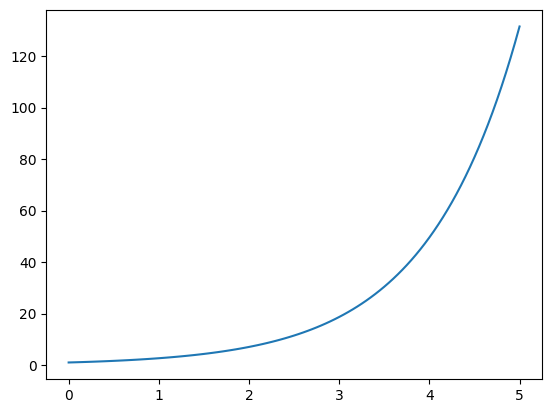

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t, Y = Euler(a=0, b=5, N=100, F=ej1, X0=1)

plt.plot(t, Y)
plt.show()

### Inciso 2

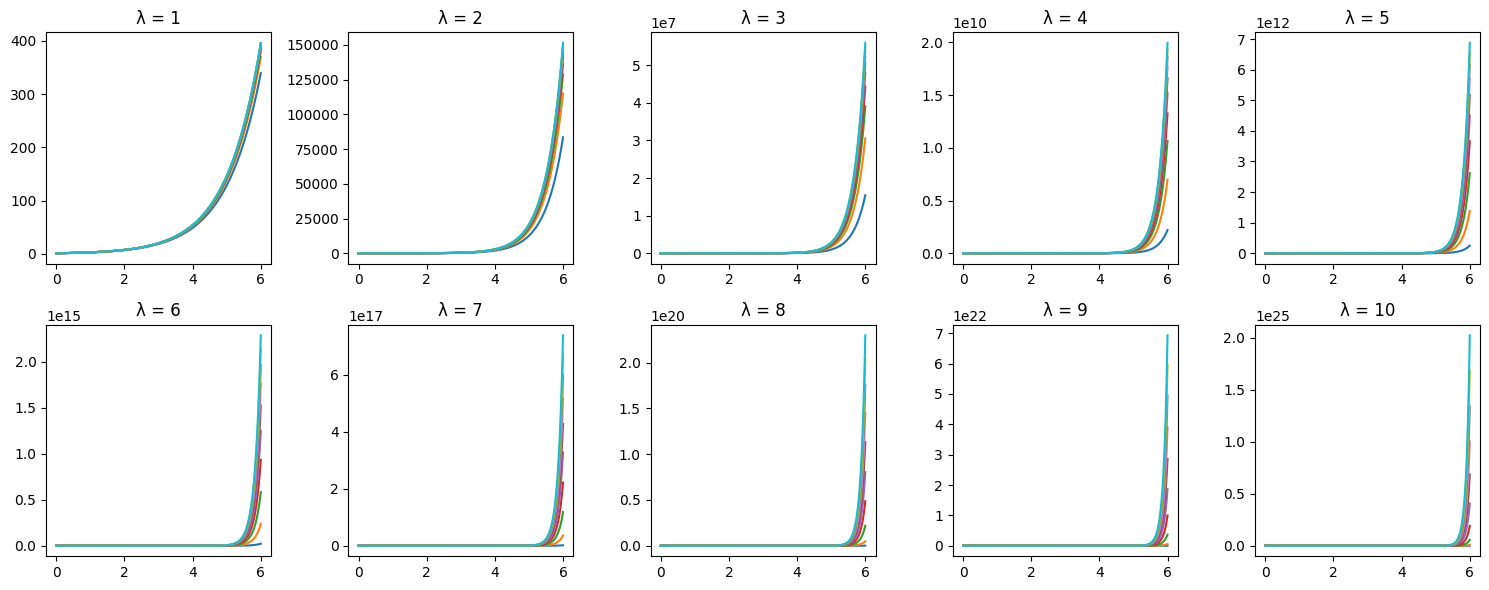

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for idx, lmbd in enumerate(range(1, 11)):
    for n in [100*x for x in range(1, 11)]:
        t, Y = Euler(a=0, b=6, N=n, F=ej1, X0=1)
        axes[idx].plot(t, Y)
        axes[idx].set_title(f"λ = {lmbd}")

plt.tight_layout()
plt.show()

### Inciso 3

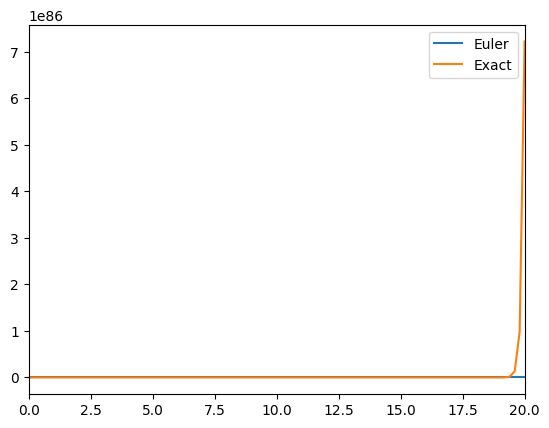

In [ ]:
n = 20
lmbd = 10

t, Y = Euler(a=0, b=20, N=100, F=ej1, X0=1)
# solucion exacta
Y_exact = np.exp(lmbd*t)

#change xlim
plt.xlim(0, 20)
plt.plot(t, Y)
plt.plot(t, Y_exact)
plt.legend(['Euler', 'Exact'])
plt.show()

Los pasos ahora son muy grandes, entonces no replica bien la curvatura de la exponencial.

## Ejercicio 2

### Inciso 1

In [8]:
r, K = 0.2, 1000
def ej2(t, P):
    return r*P*(1-P/K)

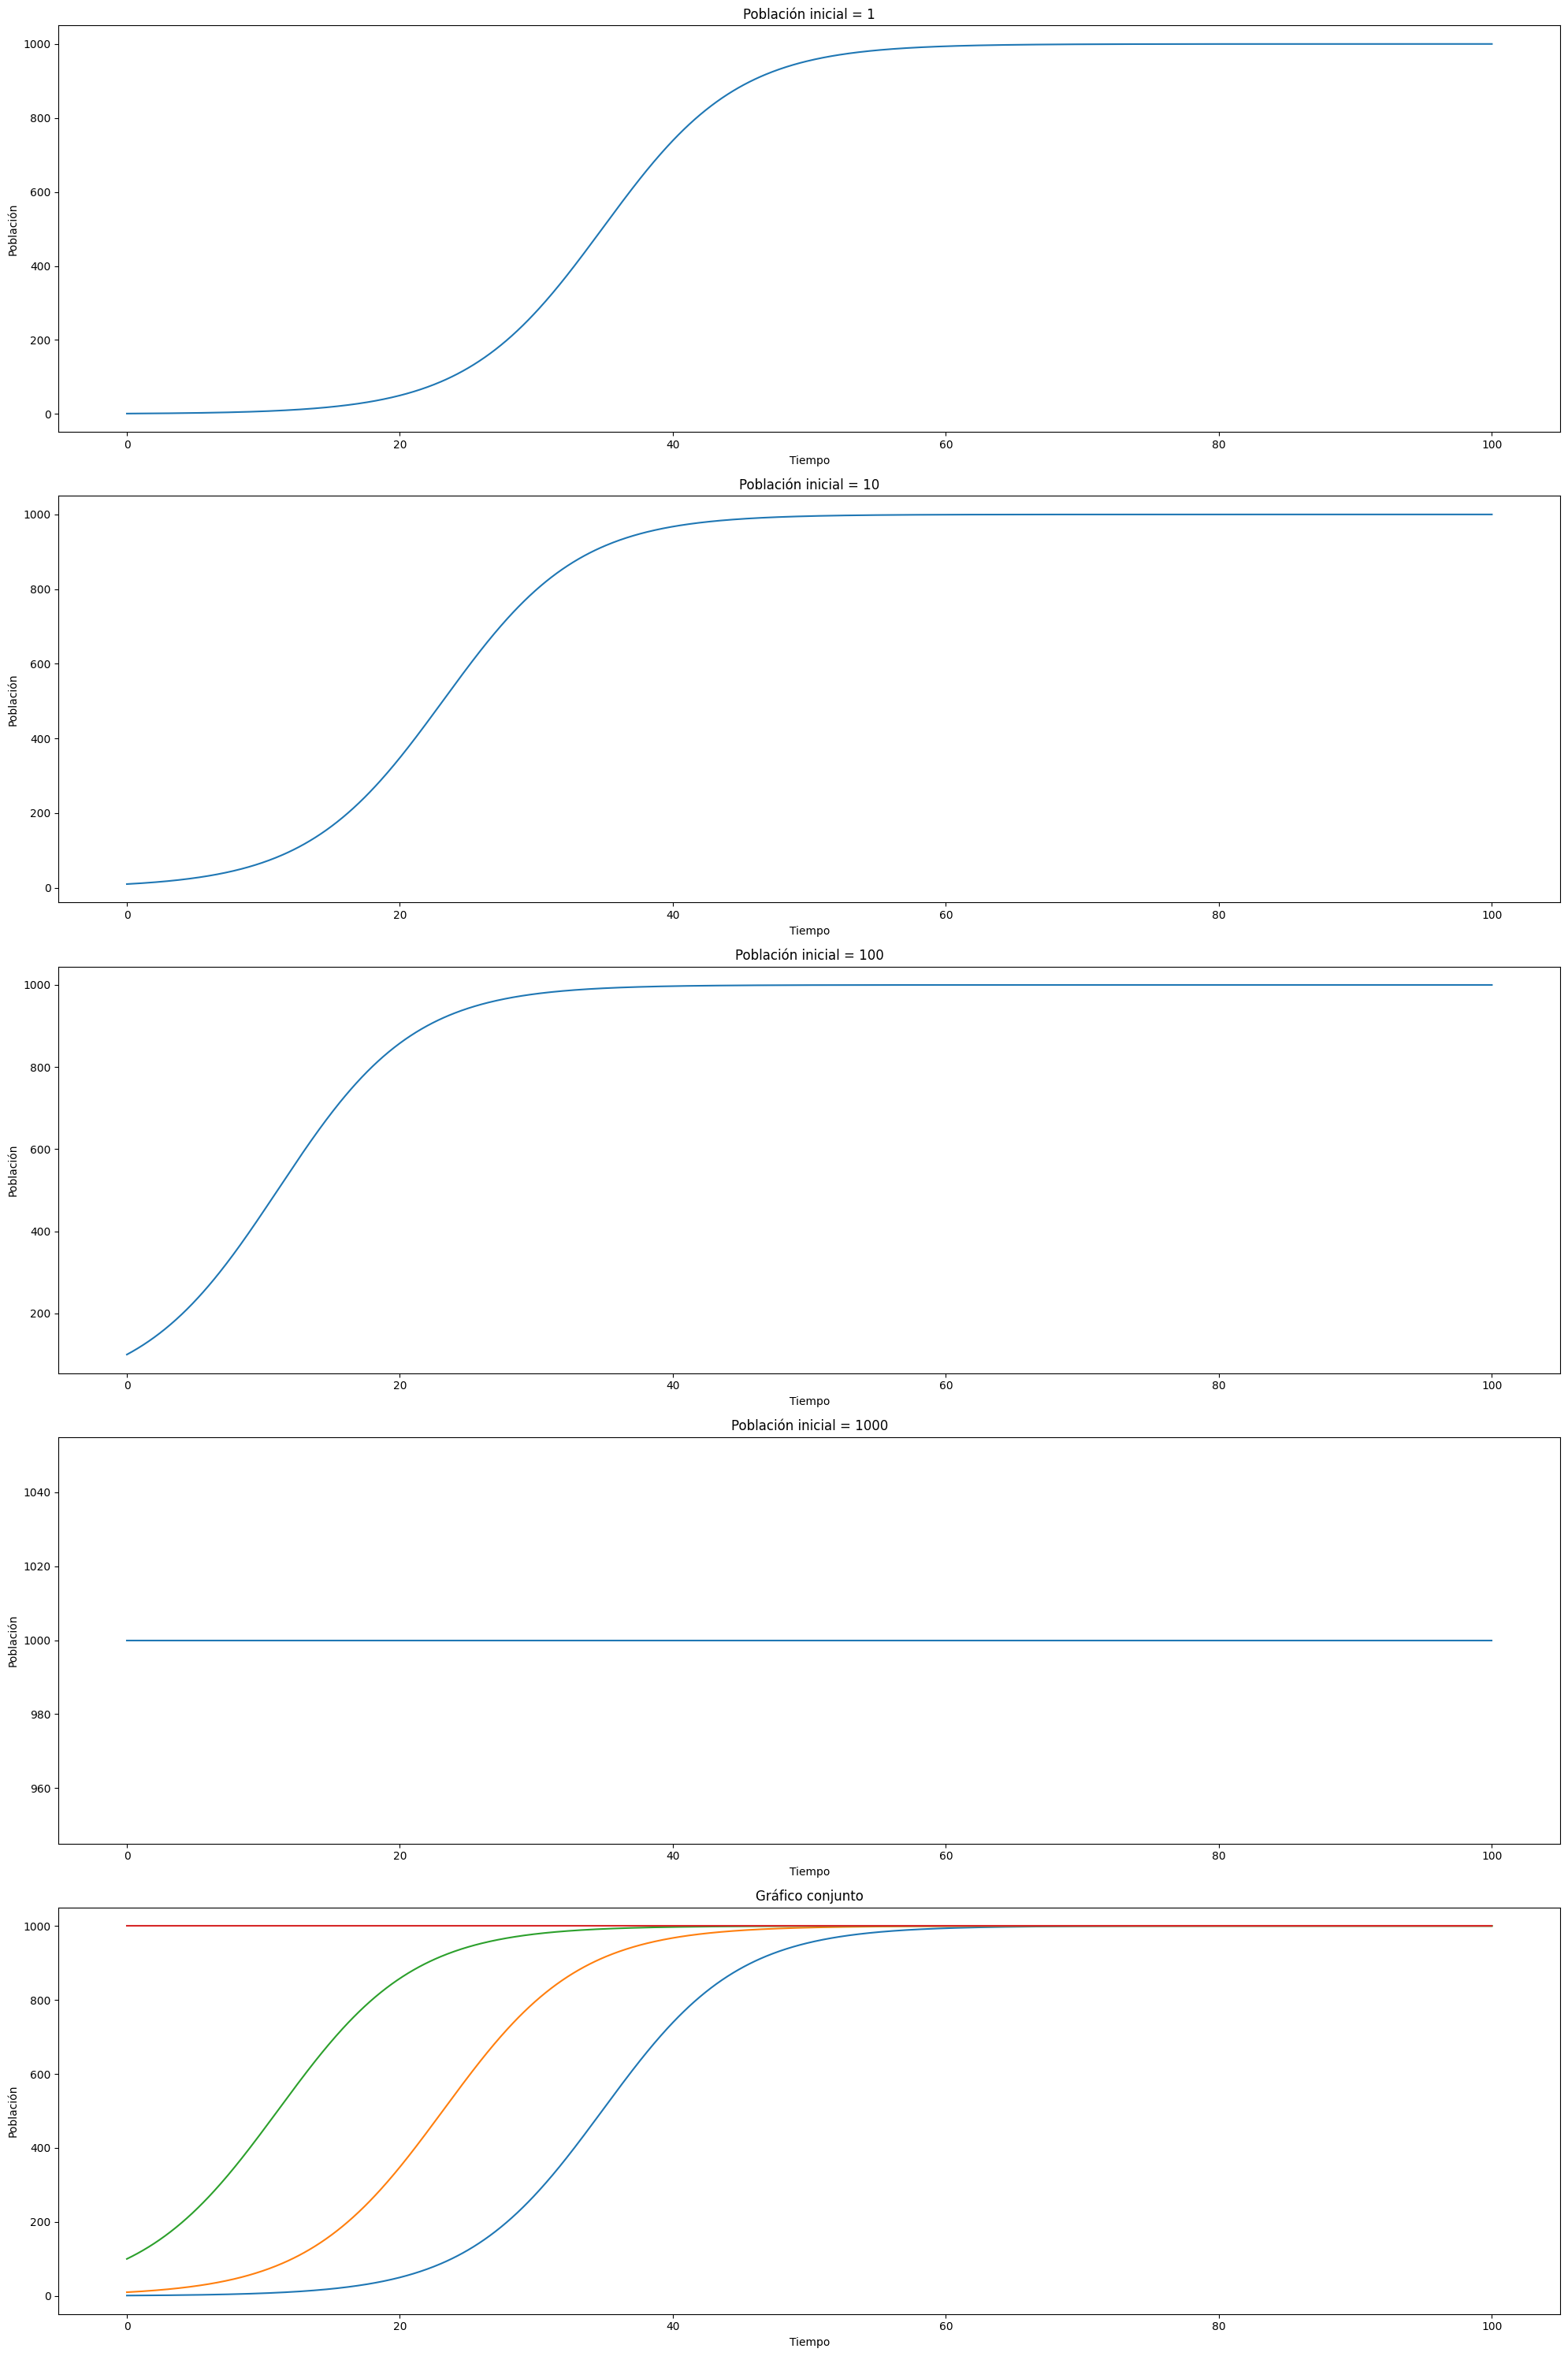

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20,30))
axes = axes.flatten()

for idx, n0 in enumerate([10**x for x in range(4)]):
    t, P = Euler(a=0, b=100, N=1000, F=ej2, X0=n0)
    axes[idx].plot(t, P)
    axes[idx].set_title(f"Población inicial = {n0}")
    axes[idx].set_xlabel("Tiempo")
    axes[idx].set_ylabel("Población")


for n0 in [10**x for x in range(4)]:
    t, P = Euler(a=0, b=100, N=1000, F=ej2, X0=n0)
    axes[4].plot(t, P)
    axes[4].set_title(f"Gráfico conjunto")
    axes[4].set_xlabel("Tiempo")
    axes[4].set_ylabel("Población")

plt.tight_layout()


plt.show()

### Inciso 2

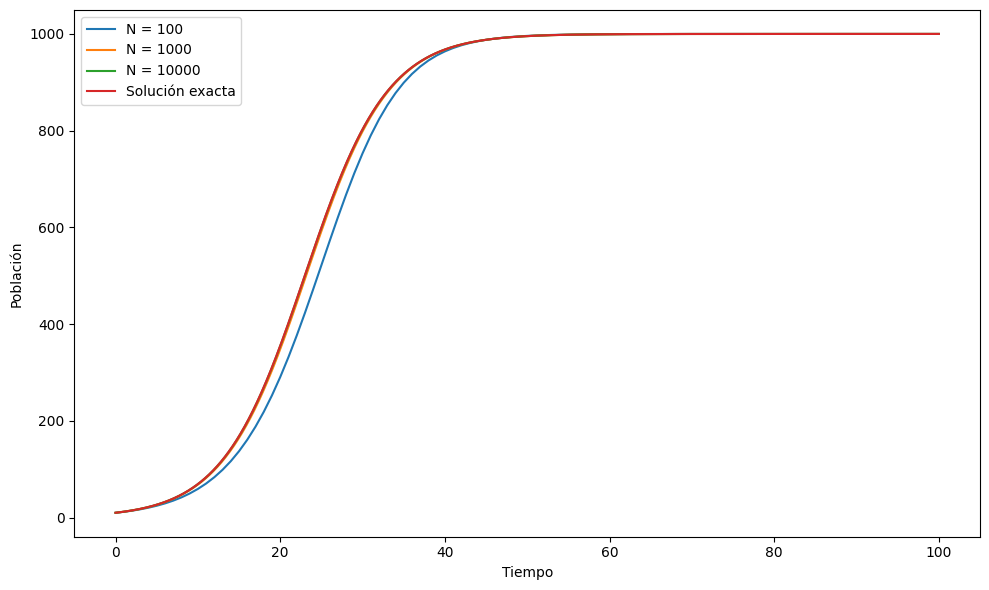

In [ ]:
plt.close('all')

plt.figure(figsize=(10, 6))
for n in [10**x for x in range(2,5)]:
    t, P = Euler(a=0, b=100, N=n, F=F, X0=10)
    plt.plot(t, P)

P_exact = [K/(1+(K-10)/10 * np.exp(-r*t)) for t in t]
plt.plot(t, P_exact)
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend([f'N = {N}' for N in [10**x for x in range(2,5)]]+["Solución exacta"])
plt.tight_layout()
plt.show()

A partir de n = 1000 la difernencia es casi imperceptible.

### Inciso 3

**PREGUNTAR**

## Ejercicio 3

In [11]:
def r(t):
    return 0.2 + 0.2 * np.cos(2* np.pi * t)

K = 1000
m = 0.1

def ej3(t, Y):
    return r(t)* Y * (1-Y/K) - m * Y

### Inciso 1

- $r$ es una constante de crecimiento (en este caso periódica) de la población 
- $K$ es la población máxima (capacidad de carga) del sistema. Se puede interpretar como un $Y_{max}$
- $m$ es un coecifiente corrección negativa (penalización) adicional al crecimiento poblacional

### Inciso 2

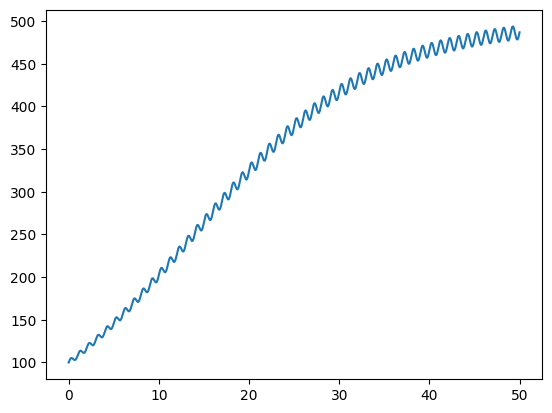

In [ ]:
t, Y = Heun(0, 50, 365*50, ej3, 100)
plt.plot(t, Y[0])
plt.show()

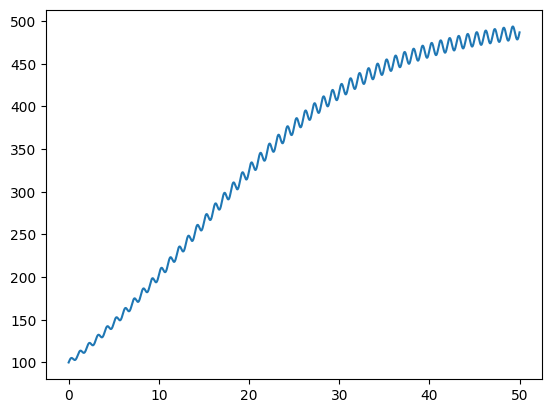

In [15]:
Y0 = np.array([100])
t, Y = RungeKutta(0, 50, 365*50, ej3, Y0)

plt.plot(t, Y[0])
plt.show()

### Inciso 3

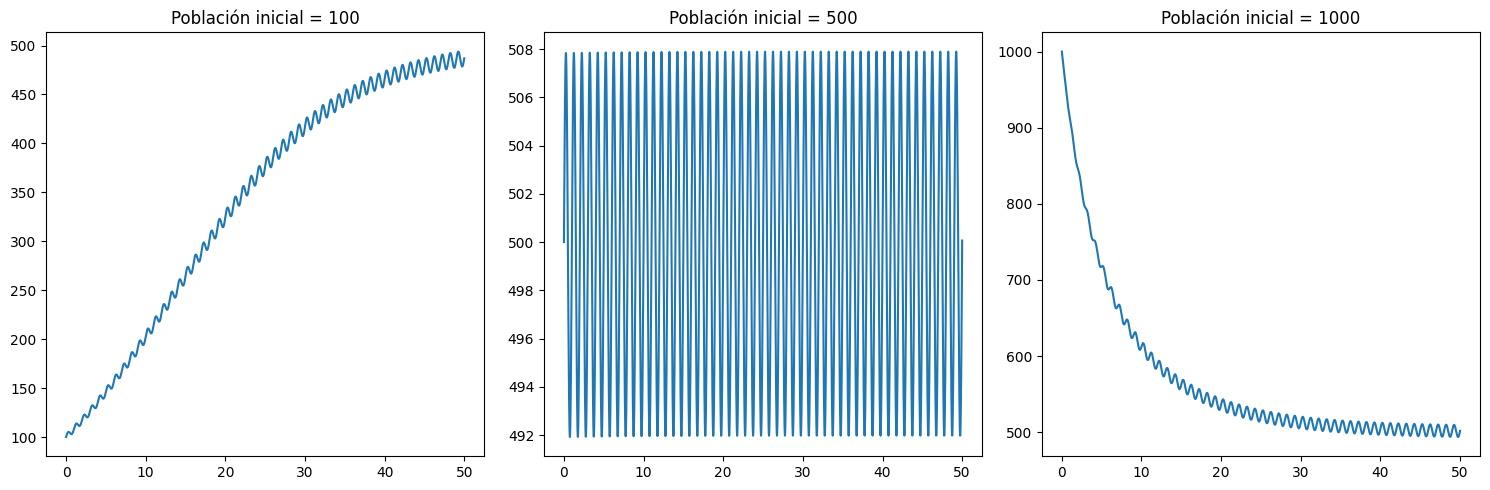

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

for idx, n0 in enumerate([100, 500, 1000]):
    t, Y = Heun(0, 50, 365*50, ej3, n0)
    axes[idx].plot(t, Y[0])
    axes[idx].set_title(f"Población inicial = {n0}")

plt.tight_layout()
plt.show()

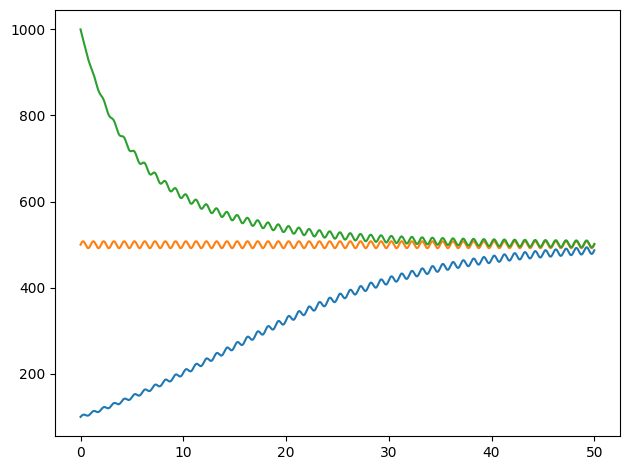

In [ ]:
for n0 in [100, 500, 1000]:
    t, Y = Heun(0, 50, 365*50, ej3, n0)
    plt.plot(t, Y[0])

plt.tight_layout()
plt.show()

## Ejercicio 4

In [ ]:
def RungeKutta_vectorial(a, b, n, F, Y0):
    h = (b-a)/n
    t = np.linspace(a, b, n+1)

    k = Y0.shape[0]
    y = np.zeros((k, n+1)) # almaceno las soluciones en un vector de k filas (las k ecuaciones) y n+1 columnas (1 por cada salto en h)
                           # el (n+1) es porque incluye al 0
    y[:, 0] = Y0

    for i in range (1, n+1):
        K1 = F(t[i-1], y[:,i-1])
        K2 = F(t[i-1] + h, y[:, i-1] + h * K1)
        y[:, i] = y[:, i-1] + h * ((1/2)*K1 + (1/2)*K2)

    return t, y

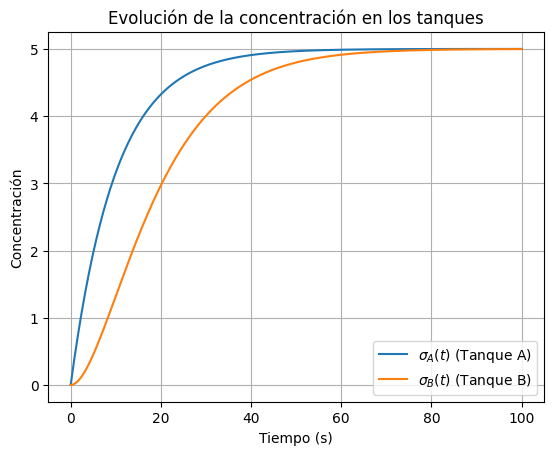

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de tanques para ver si anda(?)
def sistema_tanques(t, Y):
    v = 1.0  # Caudal de flujo
    V = 10.0  # Volumen del tanque
    m = 5.0   # Masa del soluto

    sigma_A, sigma_B = Y
    d_sigma_A = (-v/V) * sigma_A + (m/V)
    d_sigma_B = (v/V) * sigma_A - (v/V) * sigma_B

    return np.array([d_sigma_A, d_sigma_B])

# condición inicial
Y0 = np.array([0.0, 0.0])


a, b = 0, 100
n = 500

# pruebo runge kutta
t, Y = RungeKutta_vectorial(a, b, n, sistema_tanques, Y0)

plt.plot(t, Y[0, :], label=r'$\sigma_A(t)$ (Tanque A)')
plt.plot(t, Y[1, :], label=r'$\sigma_B(t)$ (Tanque B)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración')
plt.title('Evolución de la concentración en los tanques')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 5

### Inciso 1

In [30]:
cr = 0.028
m = 0.084

def ej5(t, v):
    return 9.81 - cr/m * v**2

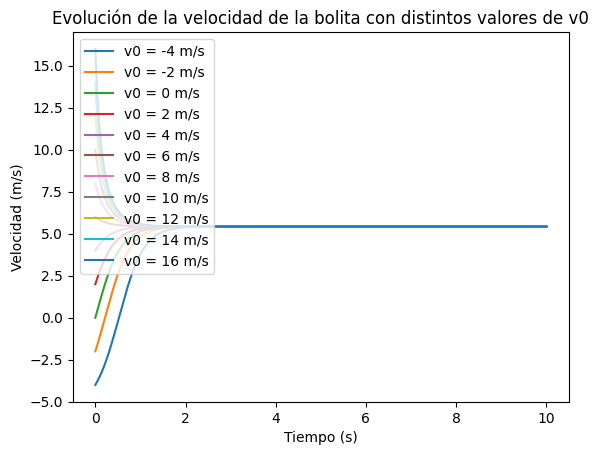

In [33]:
a, b = 0, 10
v = [-4 + x for x in range(0, 21, 2)]
n = 10000

for v0 in v:
    t, sol = RungeKutta(a, b, n, ej5, np.array([v0]))
    plt.plot(t, sol[0], label=f"v0 = {v0} m/s")

plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Evolución de la velocidad de la bolita con distintos valores de v0")
plt.legend()
plt.show()

$$
\frac{dv}{dt} = 0
$$

$$
g = \frac{c_r}{m} v^2
$$

$$
v_t = \sqrt{\frac{g m}{c_r}}
$$

$$
v_t = \sqrt{\frac{9.81 \times 0.084}{0.028}} \approx 5 \, \text{m/s}
$$


### Inciso 2

In [23]:
def ej5_2(t, Y):
    v, x = Y
    dvdt = 9.81 - cr/m * v**2
    dxdt = -v
    return np.array([dvdt, dxdt])

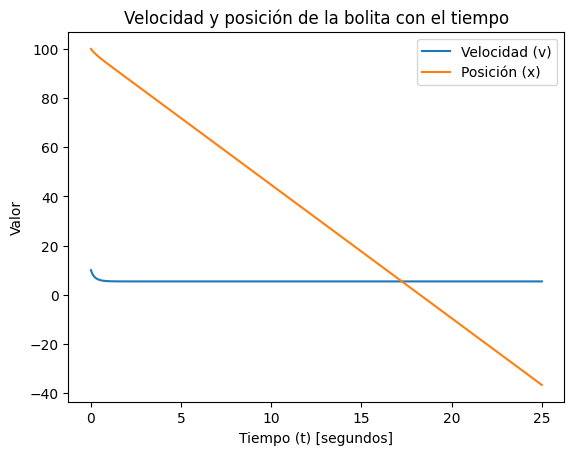

In [25]:
# Condiciones iniciales
v0 = 10  # Velocidad inicial (en m/s)
x0 = 100  # Altura inicial más razonable (en metros)
Y0 = np.array([v0, x0])

a, b = 0, 25  # Tiempo de 0 a 10 segundos
n = 10000  # Número de pasos en la integración

# Solución numérica utilizando el método de Runge-Kutta
t, Y = RungeKutta(a, b, n, ej5_2, Y0)

# Graficar resultados
plt.plot(t, Y[0, :], label="Velocidad (v)")
plt.plot(t, Y[1, :], label="Posición (x)")
plt.xlabel('Tiempo (t) [segundos]')
plt.ylabel('Valor')
plt.legend()
plt.title("Velocidad y posición de la bolita con el tiempo")
plt.show()


## Ejercicio 6

### Inciso 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def plot_ej6(alpha, beta, delta, gamma, t, n, x0, y0):
    
    def ej16(t, XY):
        x, y = XY
        dXdt = -alpha * x + gamma * x * y
        dYdt = beta * y - delta * x * y
        return np.array([dXdt, dYdt])
    
    XY0 = np.array([x0, y0])
    
    
    t_vals, Sol = RungeKutta(0, t, n, ej16, XY0)

    X_vals, Y_vals = np.linspace(0,10,100), np.linspace(0,10,100)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dX[i, j], dY[i, j] = ej16(0, np.array([X[i, j], Y[i, j]]))
    
    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: evolución temporal
    axs[0].plot(t_vals, Sol[0], label='x (predadores)')
    axs[0].plot(t_vals, Sol[1], label='y (presas)')
    axs[0].set_title('Evolución temporal')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel('Población')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].axhline(alpha/gamma, color = "black", linestyle = "--")
    axs[0].axhline(beta/delta, color = "black", linestyle = "--")


    # Subplot 2: diagrama de fase
    axs[1].streamplot(X, Y, dX, dY, density=1.2)
    axs[1].plot(Sol[0], Sol[1], 'r-', label='Trayectoria')
    axs[1].set_title('Diagrama de fase')
    axs[1].set_xlabel('x (predadores)')
    axs[1].set_ylabel('y (presas)')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_xlim([0, 10])
    axs[1].set_ylim([0, 10])
    axs[1].plot([beta/delta],[alpha/gamma], 'ro', markersize=10)

    plt.tight_layout()
    plt.show()

interact(
    plot_ej6,
    alpha=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
    beta=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
    delta=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
    gamma=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5),
    t=FloatSlider(min=5, max=500, step=1, value=30),
    n=IntSlider(min=100, max=1000, step=100, value=500),
    x0=FloatSlider(min=0.1, max=10, step=0.1, value=2),
    y0=FloatSlider(min=0.1, max=10, step=0.1, value=2)
)

interactive(children=(FloatSlider(value=0.5, description='alpha', max=2.0), FloatSlider(value=0.5, description…

<function __main__.plot_ej6(alpha, beta, delta, gamma, t, n, x0, y0)>

### Inciso 2

In [4]:
a, b = 0, 100
n = 10000

alpha1 = beta1 = gamma1 = delta1 = 1/2

def plot_ej6_2i(x0, y0):
    def ej16(t, XY):
        x, y = XY
        dXdt = -alpha1 * x + gamma1 * x * y
        dYdt = beta1 * y - delta1 * x * y
        return np.array([dXdt, dYdt])
    
    XY0 = np.array([x0, y0])

    t1, Sol1 = RungeKutta(a, b, n, ej16, XY0)

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))

    # Subplot 1: evolución temporal
    axs[0].plot(t1, Sol1[0], label='x (predador)')
    axs[0].set_title('Evolución temporal')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel('Población')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].axhline(beta1/delta1, color = "black", linestyle = "--")


    # Subplot 2: diagrama de fase
    axs[1].plot(t1, Sol1[1], label='y (presa)', color= "orange")
    axs[1].set_title('Evolución temporal')
    axs[1].set_xlabel('Tiempo')
    axs[1].set_ylabel('Población')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].axhline(alpha1/gamma1, color = "black", linestyle = "--")

    axs[2].plot(Sol1[0], Sol1[1], label='y (presa) en función de x (predador)')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

interact(
    plot_ej6_2i,
    x0=FloatSlider(min=0.5, max=1.5, step=0.01, value=0.95),
    y0=FloatSlider(min=0.5, max=1.5, step=0.01, value=0.95)
)

interactive(children=(FloatSlider(value=0.95, description='x0', max=1.5, min=0.5, step=0.01), FloatSlider(valu…

<function __main__.plot_ej6_2i(x0, y0)>

/var/folders/v5/vrmq23k56_x2v6y175jf3kbw0000gn/T/ipykernel_2853/1264210054.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


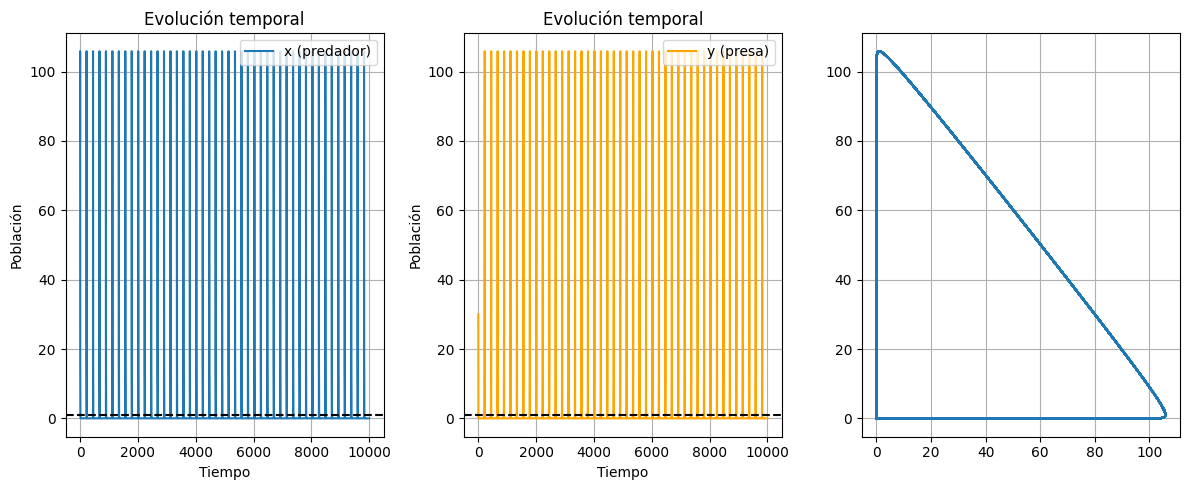

In [5]:
a, b = 0, 10000
n = 10000000

alpha2, beta2, gamma2, delta2 = 1/4, 1, 1/100, 1/100


def plot_ej6_2ii(x0, y0):
    def ej16(t, XY):
        x, y = XY
        dXdt = -alpha1 * x + gamma1 * x * y
        dYdt = beta1 * y - delta1 * x * y
        return np.array([dXdt, dYdt])
    
    XY0 = np.array([x0, y0])

    t1, Sol1 = RungeKutta(a, b, n, ej16, XY0)

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))

    # Subplot 1: evolución temporal
    axs[0].plot(t1, Sol1[0], label='x (predador)')
    axs[0].set_title('Evolución temporal')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel('Población')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].axhline(beta1/delta1, color = "black", linestyle = "--")


    # Subplot 2: diagrama de fase
    axs[1].plot(t1, Sol1[1], label='y (presa)', color= "orange")
    axs[1].set_title('Evolución temporal')
    axs[1].set_xlabel('Tiempo')
    axs[1].set_ylabel('Población')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].axhline(alpha1/gamma1, color = "black", linestyle = "--")

    axs[2].plot(Sol1[0], Sol1[1], label='y (presa) en función de x (predador)')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()


plot_ej6_2ii(80, 30)

Si dejamos un $n$ chico y un tiempo chico, el sistema o bien colapsa o se queda en $0$ para ambas especies.

Ahora bien, si aumentamos el tiempo y ponemos un n excesivamente grande, se puede ver la curva poblacional bien.

Lo que sucede es que se necesita mucho tiempo y pasos muy chicos para poder describir el comportamiento poblacional, ya que no solo lleva mucho tiempo, sino que también ocurre con una velocidad muy alta.

## Ejercicio 7

### Inciso 1

In [ ]:
def ej7(t, ABXY):
    A, B, X, Y = ABXY
    dAdt = -k1 * A * X
    dBdt = k3 * Y
    dXdt = k1 * A * X - k2 * X * Y
    dYdt = k2 * X * Y - k3 * Y 
    return np.array([dAdt, dBdt, dXdt, dYdt])


### Inciso 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

A0 = 1/3
B0 = 0
X0 = 1/3
Y0 = 1/3

def plot_ej7(k1, k2, k3):
    def ej7(t, ABXY):
        A, B, X, Y = ABXY
        dAdt = -k1 * A * X
        dBdt = k3 * Y
        dXdt = k1 * A * X - k2 * X * Y
        dYdt = k2 * X * Y - k3 * Y 
        return np.array([dAdt, dBdt, dXdt, dYdt])

    ABXY0 = np.array([A0, B0, X0, Y0])

    t, Sol = RungeKutta(0, 100, 1000, ej7, ABXY0)

    plt.plot(t, Sol[0], label='A(t)')
    plt.plot(t, Sol[1], label='B(t)')
    plt.plot(t, Sol[2], label='X(t)')
    plt.plot(t, Sol[3], label='Y(t)')
    plt.legend()
    plt.show()

    state = True
    for t0 in range(len(t)):
        if Sol[0][t0] + Sol[1][t0] + Sol[2][t0] + Sol[3][t0]<0.9999 or Sol[0][t0] + Sol[1][t0] + Sol[2][t0] + Sol[3][t0] > 1.0001:
            state = False
    
    if state == True:
        print("Se cumple que A + B + X + Y = 1 para todo t.")

interact(plot_ej7, 
    k1=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k2=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k3=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5))


interactive(children=(FloatSlider(value=0.5, description='k1', max=0.99, min=0.01, step=0.01), FloatSlider(val…

<function __main__.plot_ej7(k1, k2, k3)>

### Inciso 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

A0 = 3/8
B0 = 1/8
X0 = 1/4
Y0 = 1/4

def plot_ej7(k1, k2, k3):
    def ej7(t, ABXY):
        A, B, X, Y = ABXY
        dAdt = 0
        dBdt = 0
        dXdt = k1 * A * X - k2 * X * Y
        dYdt = k2 * X * Y - k3 * Y 
        return np.array([dAdt, dBdt, dXdt, dYdt])

    ABXY0 = np.array([A0, B0, X0, Y0])

    t, Sol = RungeKutta(0, 100, 1000, ej7, ABXY0)

    plt.plot(t, Sol[0], label='A(t)')
    plt.plot(t, Sol[1], label='B(t)')
    plt.plot(t, Sol[2], label='X(t)')
    plt.plot(t, Sol[3], label='Y(t)')
    plt.legend()
    plt.show()

    state = True
    for t0 in range(len(t)):
        if Sol[0][t0] + Sol[1][t0] + Sol[2][t0] + Sol[3][t0]<0.9999 or Sol[0][t0] + Sol[1][t0] + Sol[2][t0] + Sol[3][t0] > 1.0001:
            state = False
    
    if state == True:
        print("Se cumple que A + B + X + Y = 1 para todo t.")

interact(plot_ej7, 
    k1=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k2=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k3=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='k1', max=0.99, min=0.01, step=0.01), FloatSlider(val…

<function __main__.plot_ej7(k1, k2, k3)>

Se forman ciclos. La variación de A y B es 0. La variación de X e Y derivan de las propias ecuaciones. Se forman autovalores complejos cuando se hace el análisis de las dos ecuaciones restantes (dado que las dos primeras pueden ser obviadas dado que A y B ahora se consideran constantes). Esto hace que se formen ciclos en las soluciones. Si graficamos el diagrama de fases, esto se puede ver claramente.

Es un sistema predador-presa tipo Lotka Volterra.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

A0 = 3/8
B0 = 1/8
X0 = 1/4
Y0 = 1/4

def plot_ej7(k1, k2, k3):
    def ej7(t, ABXY):
        A, B, X, Y = ABXY
        dAdt = 0
        dBdt = 0
        dXdt = k1 * A * X - k2 * X * Y
        dYdt = k2 * X * Y - k3 * Y 
        return np.array([dAdt, dBdt, dXdt, dYdt])

    ABXY0 = np.array([A0, B0, X0, Y0])
    t, Sol = RungeKutta(0, 1000, 10000, ej7, ABXY0)

    X_vals, Y_vals = np.linspace(0,max(Sol[2]) + 0.25,100), np.linspace(0,max(Sol[3])+0.25,100)
    X, Y = np.meshgrid(X_vals, Y_vals)
    dX, dY = np.zeros_like(X), np.zeros_like(Y)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dX[i,j], dY[i,j] = ej7(0, np.array([A0, B0, X[i,j], Y[i,j]]))[2], ej7(0, np.array([A0, B0, X[i,j], Y[i,j]]))[3] 


    plt.streamplot(X, Y, dX, dY, broken_streamlines=False)
    plt.plot(Sol[2], Sol[3], label='Trajectory')
    plt.show()

interact(plot_ej7, 
    k1=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k2=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5),
    k3=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='k1', max=0.99, min=0.01, step=0.01), FloatSlider(val…

<function __main__.plot_ej7(k1, k2, k3)>

## Ejercicio 8

### Incisos 1 y 2

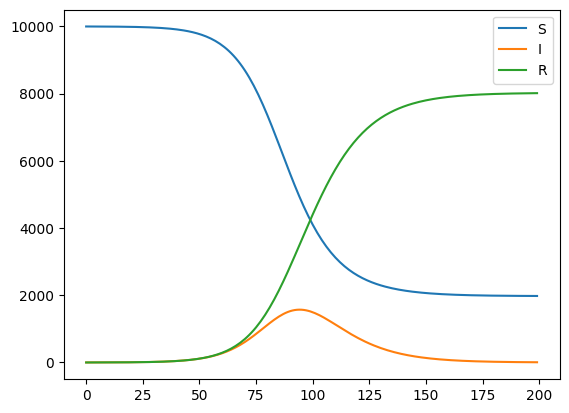

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def ej8(beta=0.2, gamma=1/10, N0= 10000, T=200):
    t = np.arange(0,T,1)
    S = np.zeros(t.size)
    I = np.zeros(t.size)
    R = np.zeros(t.size)
    S[0] = N0-1
    I[0] = 1
    R[0] = 0
    for i in range(1,t.size):
        S[i] = S[i-1]-beta*S[i-1]*I[i-1]/N0  # no hay h porque es un dia, h=1
        I[i] = I[i-1]+beta*S[i-1]*I[i-1]/N0-gamma*I[i-1]
        R[i] = R[i-1]+gamma*I[i-1]
    return t, S, I, R

t, S, I, R  = ej8()

plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.legend(['S', 'I', 'R'])
plt.show()


### Inciso 3

In [44]:
for i in range(len(t)):
    if 9999.9 > S[i] + I[i] + R[i] or 10000.1 < S[i] + I[i] + R[i]:
        print("No se mantiene constante")

print("Se mantiene constante")

Se mantiene constante


### Inciso 4

In [45]:
t_infectados_max = None
for i in range(1,len(t)):
    if I[i] < I[i-1]:
        t_infectados_max = i

print(t_infectados_max)

199


### Inciso 5

El tiempo de ejecución es 0.004964113235473633 segundos


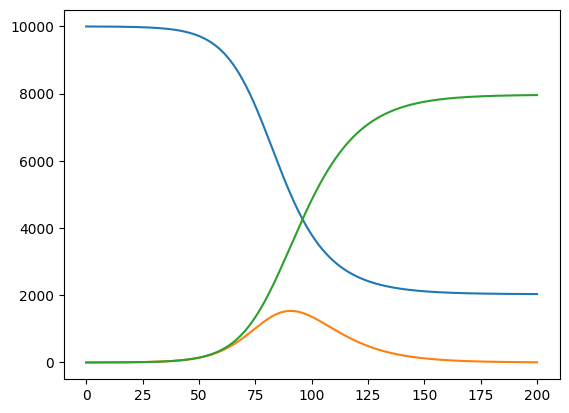

In [4]:
# Lo hago con Runge Kutta para verificar el tiempo de ejecución
import time

beta = 0.2
gamma = 1/10
N = 10000
def ej8_2(t, X):
    S, I, R = X
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

X0 = np.array([9999,1,0])

start = time.time()
t, Sol = RungeKutta(0,200,1000, ej8_2, X0)
end = time.time()

print(f"El tiempo de ejecución es {end-start} segundos")

plt.plot(t, Sol[0], label="S(t)")
plt.plot(t, Sol[1], label="I(t)")
plt.plot(t, Sol[2], label="R(t)")
plt.show()



## Ejercicio 9

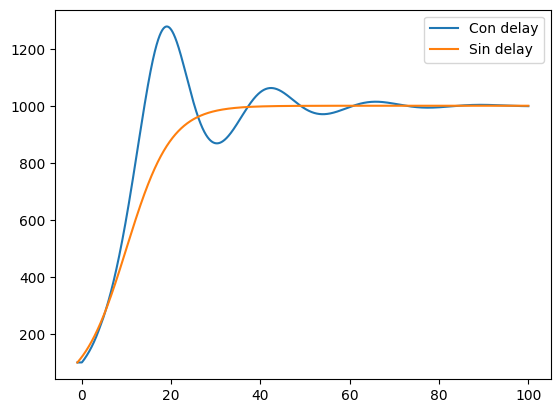

In [36]:
import matplotlib.pyplot as plt
import numpy as np

r, K = 0.2, 1000
tau = 5

def ej9(t, N, N_tau):
    return r*N*(1-(N_tau/K)) # es la ecuación del enunciado

def ej2(t, P):
    return r*P*(1-P/K)

def EulerDelay(a, b, n, F, N0):
    h = (b-a)/n
    t = np.linspace(a, b, n+1)
    N = np.zeros(n+1)

    for i in range(n+1):
        if t[i]<0:
            N[i] = N0
        else:
            N[i] = N[i-1] + h*F(t[i-1], N[i-1], N[int(i-1-tau/h)])

    return t, N

t_delay, N_delay = EulerDelay(-1, 100, 10000, ej9, 100)
t_sin_delay, N_sin_delay = Euler(-1, 100, 10000, ej2, 100)
plt.plot(t_delay, N_delay)
plt.plot(t_sin_delay, N_sin_delay)
plt.legend(["Con delay", "Sin delay"])
plt.show()

## Ejercicio 10

$$\left\{ \begin{array}{lcc} \frac{dS(t)}{dt} = -β\frac{S(t-\tau)I(t-\tau)}{N} \\ \\ \frac{dI(t)}{dt} = β\frac{S(t)I(t)}{N}-γI(t) \\ \\\frac{dR(t)}{dt} = γI(t) \end{array} \right. $$ 


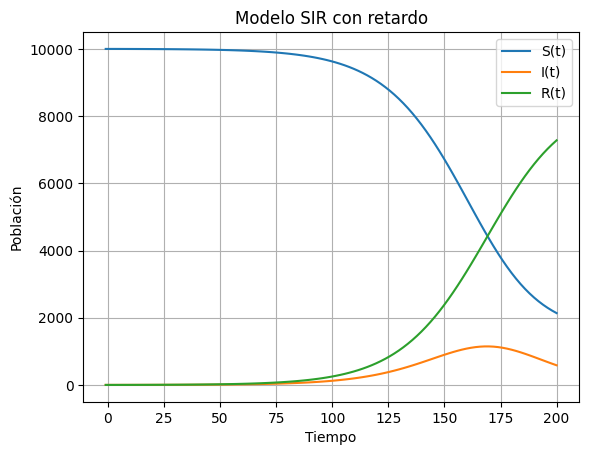

In [38]:
# Parámetros del modelo
beta = 0.2
N = 10000
gamma = 1 / 10
tau = 5


def ej10(t, Y, Y_tau):
    S, I, R = Y
    S_tau, I_tau, R_tau = Y_tau

    dSdt = -beta * (S_tau * I_tau) / N
    dIdt = beta * (S_tau * I_tau) / N - gamma * I
    dRdt = gamma * I

    return np.array([dSdt, dIdt, dRdt])


def RungeKuttaDelay(a, b, n, F, Y0):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.zeros((Y0.shape[0], n + 1))
    y[:, 0] = Y0

    for i in range(1, n + 1):
        if t[i - 1] < 0:
            y[:, i] = Y0
        else:
            delay_index = int(i - 1 - tau / h)
            K1 = F(t[i - 1], y[:, i - 1], y[:, delay_index])
            K2 = F(t[i - 1], y[:, i - 1] + h * K1, y[:, delay_index] + h * K1)
            y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

    return t, y

Y0 = np.array([N - 1, 1, 0])

t, Sol = RungeKuttaDelay(-1, 200, 100, ej10, Y0)

plt.plot(t, Sol[0], label='S(t)')
plt.plot(t, Sol[1], label='I(t)')
plt.plot(t, Sol[2], label='R(t)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.title('Modelo SIR con retardo')
plt.show()


El delay ralentiza el proceso. Todas las curvas se "alargan". Lo vemos mejor en el siguiente gráfico interactivo.

In [45]:
def plot_ej10(tau):
    beta = 0.2
    N = 10000
    gamma = 1 / 10


    def ej10(t, Y, Y_tau):
        S, I, R = Y
        S_tau, I_tau, R_tau = Y_tau

        dSdt = -beta * (S_tau * I_tau) / N
        dIdt = beta * (S_tau * I_tau) / N - gamma * I
        dRdt = gamma * I

        return np.array([dSdt, dIdt, dRdt])


    def RungeKuttaDelay(a, b, n, F, Y0):
        h = (b - a) / n
        t = np.linspace(a, b, n + 1)
        y = np.zeros((Y0.shape[0], n + 1))
        y[:, 0] = Y0

        for i in range(1, n + 1):
            if t[i - 1] < 0:
                y[:, i] = Y0
            else:
                delay_index = int(i - 1 - tau / h)
                K1 = F(t[i - 1], y[:, i - 1], y[:, delay_index])
                K2 = F(t[i - 1], y[:, i - 1] + h * K1, y[:, delay_index] + h * K1)
                y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

        return t, y

    Y0 = np.array([N - 1, 1, 0])

    t, Sol = RungeKuttaDelay(-1, 500, 100, ej10, Y0)

    plt.plot(t, Sol[0], label='S(t)')
    plt.plot(t, Sol[1], label='I(t)')
    plt.plot(t, Sol[2], label='R(t)')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend()
    plt.grid()
    plt.title('Modelo SIR con retardo')
    plt.show()

interact(plot_ej10, tau=IntSlider(value = 0, min = 0, max = 30, step = 1))

interactive(children=(IntSlider(value=0, description='tau', max=30), Output()), _dom_classes=('widget-interact…

<function __main__.plot_ej10(tau)>

## Ejercicio 11

### Inciso 1

In [2]:
import numpy as np

G = 0.4982  # constante gravitacional (m^3 / día^2 kg)

# masas de los cuerpos
m1, m2, m3 = 1.0, 1.0, 1.0

def ej11(t, u):
    # u es [x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]
    r1 = u[0:2]
    r2 = u[2:4]
    r3 = u[4:6]
    
    v1 = u[6:8]
    v2 = u[8:10]
    v3 = u[10:12]

    # calculo las componentes de la aceleracion (r doble .) por separado
    def fuerza(mj, ri, rj):
        d = np.linalg.norm(rj - ri)
        return G * mj * (rj - ri) / d**3

    # Aceleraciones
    a1 = fuerza(m2, r1, r2) + fuerza(m3, r1, r3)
    a2 = fuerza(m1, r2, r1) + fuerza(m3, r2, r3)
    a3 = fuerza(m1, r3, r1) + fuerza(m2, r3, r2)

    # Derivadas del vector de estado
    du = np.zeros(12)
    du[0:2] = v1
    du[2:4] = v2
    du[4:6] = v3
    du[6:8] = a1
    du[8:10] = a2
    du[10:12] = a3

    return du

### Inciso 2

In [3]:
# datos del enunciado
m1 = 1.9891e30     # masa del sol
m2 = 5.97e24       # masa de la tierra
m3 = 7.3477e22     # masa de la luna

dTS = 1.49597887e11  # m (tierra-sol)
dTL = 3.844e8        # m (tierra-luna)

rS = np.array([0.0, 0.0])
rT = np.array([dTS, 0.0])
rL = np.array([dTS, dTL])

vT = 2 * np.pi * dTS / 365 # velocidad de la tierra
vLT = 2 * np.pi * dTL / 28 # velocidad de la luna alrededor de la tierra

# velocidades iniciales de los cuerpos
vS = np.array([0.0, 0.0]) 
vT_vec = np.array([0.0, vT])
vL = np.array([-vLT, vT])

u0 = np.concatenate([rS, rT, rL, vS, vT_vec, vL]) #--> pertenece a R12

t, sol = RungeKutta(0, 365, 10000, ej11, u0)


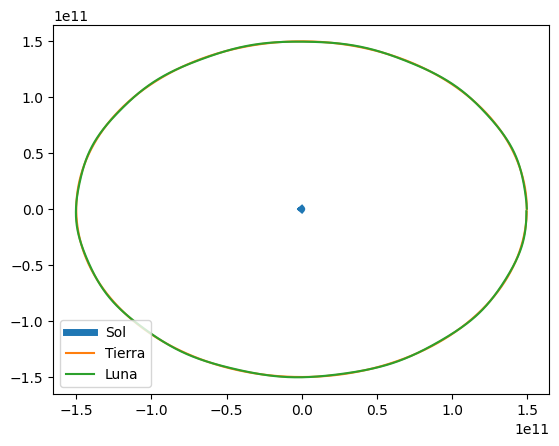

In [12]:
plt.plot(sol[0], sol[1], label="Sol", linewidth=5)
plt.plot(sol[2], sol[3], label="Tierra")
plt.plot(sol[4], sol[5], label="Luna")
plt.legend()
plt.show()

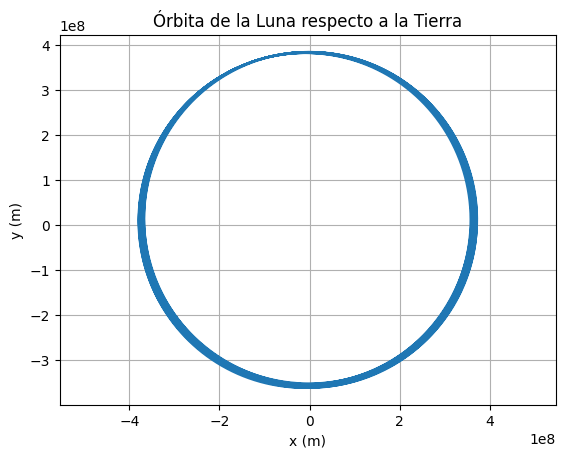

In [5]:
x_rel = sol[4] - sol[2]  # x_luna - x_tierra
y_rel = sol[5] - sol[3]  # y_luna - y_tierra

plt.plot(x_rel, y_rel)
plt.title("Órbita de la Luna respecto a la Tierra")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")
plt.grid(True)
plt.show()

## Ejercicio 12

In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/pablo/Documents/Estudio/Facultad/2025-1C/Modelado Continuo/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv')

argentina = data[data['Country Name'] == 'Argentina']

In [23]:
años = np.array([int(col) for col in argentina.columns[4:-1]])
poblacion = argentina.iloc[0, 4:-1].astype(float).values

print(años)
print(poblacion)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]
[20386045. 20726276. 21072538. 21421705. 21769453. 22112629. 22453893.
 22799059. 23150583. 23508711. 23878327. 24257208. 24644328. 25046005.
 25461351. 25874107. 26282283. 26701805. 27132158. 27568895. 28011596.
 28463959. 28924262. 29391332. 29863093. 30336441. 30811980. 31291762.
 31780532. 32270948. 32755901. 33230294. 33693527. 34152717. 34613491.
 35070020. 35513793. 35947791. 36372860. 36794682. 37213984. 37624825.
 38029349. 38424282. 38815916. 39216789. 39622115. 40016763. 40424148.
 40854831. 41288694. 41730660. 42161721. 42582455. 43024071. 43477012.
 43900313. 44288894. 44654882. 44973465. 45191965. 45312281. 45407904.
 45538401.]


In [ ]:
from scipy.optimize import curve_fit

def modelo_exponencial(t, lmbd, x0):
    return x0 * np.exp(lmbd * (t - t[0]))

params_exp, _ = curve_fit(modelo_exponencial, años, poblacion, p0=(0.02, poblacion[0]))
lmbd_opt, x0_opt = params_exp

print(f"Lambda = {lmbd_opt}")
print(f"x0 = {x0_opt}")

Lambda = 0.012635883041962956
x0 = 21762736.867106702


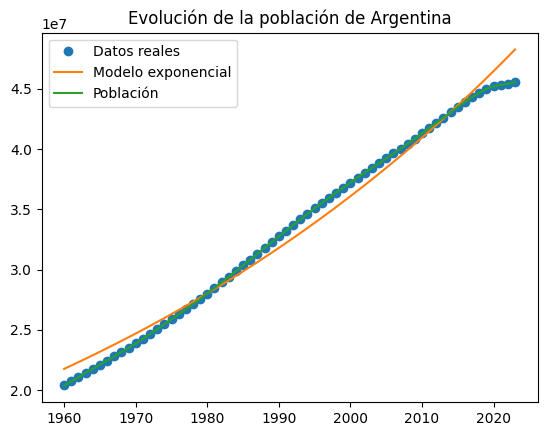

In [28]:
t_fit = np.linspace(años[0], años[-1], 300)

plt.plot(años, poblacion, 'o', label='Datos reales')
plt.plot(t_fit, modelo_exponencial(t_fit, lmbd_opt, x0_opt), label='Modelo exponencial')
plt.plot(años, poblacion, label='Población')
plt.legend()
plt.title('Evolución de la población de Argentina')
plt.show()

In [29]:
def modelo_logistico(t, r, K, x0):
    return K / (1 + ((K - x0) / x0) * np.exp(-r * (t - t[0])))

params_log, _ = curve_fit(lambda t, r, K: modelo_logistico(t, r, K, poblacion[0]), años, poblacion, p0=(0.02, 60_000_000))
r_opt, K_opt = params_log

print(f"Tasa de crecimiento óptima = {r_opt:.2f}")
print(f"Población óptima = {K_opt:.2f}")

Tasa de crecimiento óptima = 0.03
Población óptima = 67948268.90


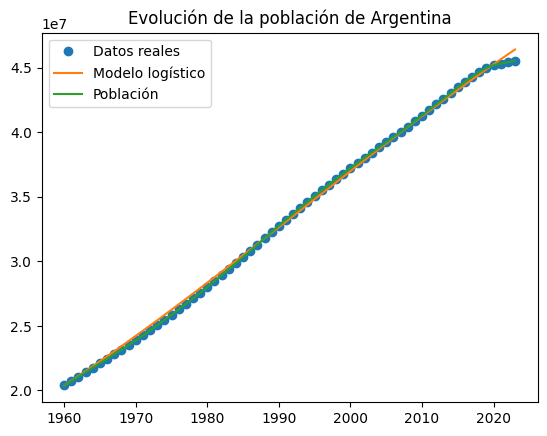

In [30]:
plt.plot(años, poblacion, 'o', label='Datos reales')
plt.plot(t_fit, modelo_logistico(t_fit, r_opt, K_opt, poblacion[0]), label='Modelo logístico')
plt.plot(años, poblacion, label='Población')
plt.legend()
plt.title('Evolución de la población de Argentina')
plt.show()

## Ejercicio 13

Es lo mismo que el anterior.

## Ejercicio 14 (2)

In [ ]:
alpha, delta, epsilon, k1, k2 = [None for i in range(5)]

# Método con factor de competencia intra-especie
def ej14_i(t, XY):
    x, y = XY
    dxdt = -alpha * x + gamma * x * y
    dydt = beta * y - delta * x * y - epsilon * y**2
    return np.array([dxdt, dydt])


Interpretación de los parámetros:
- $\alpha$: tasa de mortalidad de la especie $x$
- $\gamma$: factor de competencia entre ambas especies (suponiendo que $\gamma > 0$, entonces es beneficioso para la especie $x$, que es la el depredador)
- $\beta$: tasa de natalidad de la especie $y$
- $\delta$: factor de competencia entre ambas especies (suponiendo que $\delta > 0$, entonces es contraproducente para la especie $y$, que es la presa)
-$\epsilon$: factor de competencia intra-especie de $y$

In [ ]:
# Método de Holling
def ej14_ii(t, XY):
    x, y = XY
    dxdt = - alpha * x + gamma * x * y / (1 + k1 * y)
    dydt = beta * y - delta * x * y / (1 + k2 * y)
    return np.array([dxdt, dydt])

Interpretación de los parámetros:
- $\alpha$: tasa de mortalidad de la especie $x$
- $\gamma$: factor de competencia entre ambas especies (suponiendo que $\gamma > 0$, entonces es beneficioso para la especie $x$, que es la el depredador)
- $k_{1}$: factor que modula la eficiencia de la "caza" por parte de los depredadores. Si pensamos que la densidad de las presas es muy alta, entonces el término completo de competencia entre especies se vuelve mas chico. Si, por el contrario, hay menos presas, la capacidad de caza por parte de los depredadores aumenta.
- $\beta$: tasa de natalidad de la especie $y$
- $\delta$: factor de competencia entre ambas especies (suponiendo que $\delta > 0$, entonces es contraproducente para la especie $y$, que es la presa)
-$k_{2}$: cumple el mismo rol que $k_{1}$, pero en la ecuación de las presas. Cuanta mayor densidad hay, menor es el impacto de la depredación.

## Ejercicio 15

### Inciso 1

In [16]:
def ej15(t, YV):
    y, v = YV
    dydt = -v
    dvdt = 9.81 - cr/m * v**2
    return np.array([dydt, dvdt])

### Inciso 2

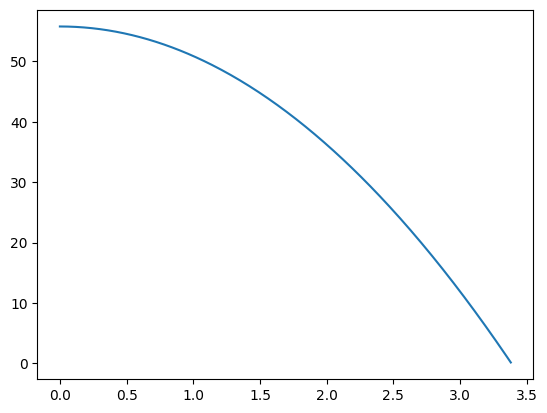

In [30]:
# Bala de cañon 
m = 16
cr = 0.0058

t, Sol = RungeKutta(0, 10, 1000, ej15, np.array([55.8, 0]))
cañon = None
t_cañon = None
t_fin_cañon = 0
for i in range(len(Sol[0])):
    if Sol[0][i] < 0:
        cañon = Sol[0][:i]
        t_cañon = t[:i]
        t_fin_cañon = t[i-1]
        break

plt.plot(t_cañon, cañon, label='Altura de la bala de cañón')

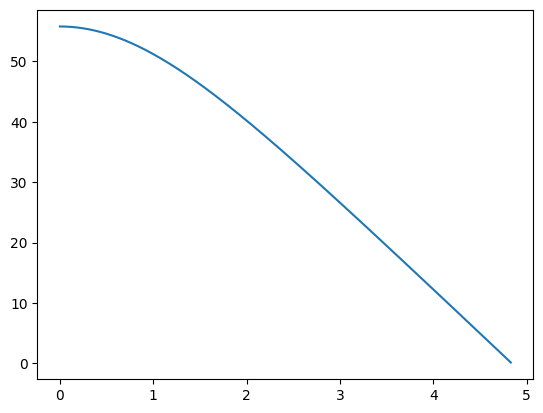

In [31]:
# Bala de mosquete 
m = 0.0082
cr = 3.74*10e-5

t, Sol = RungeKutta(0, 10, 1000, ej15, np.array([55.8, 0]))
mosquete = None
t_mosquete = None
t_fin_mosquete = 0
for i in range(len(Sol[0])):
    if Sol[0][i] < 0:
        mosquete = Sol[0][:i]
        t_mosquete = t[:i]
        t_fin_mosquete = t[i-1]
        break

plt.plot(t_mosquete, mosquete, label='Altura de la bala de mosquete')

/var/folders/v5/vrmq23k56_x2v6y175jf3kbw0000gn/T/ipykernel_63884/1907074453.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


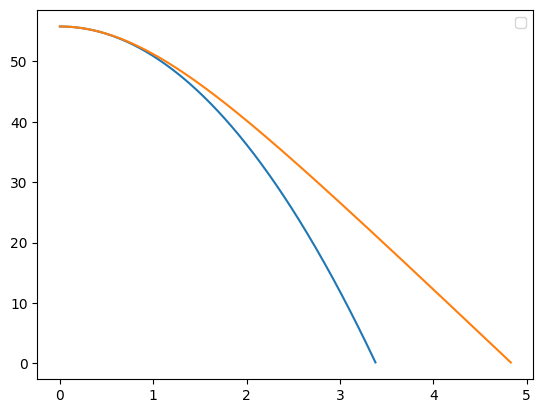

In [34]:
plt.plot(t_cañon, cañon)
plt.plot(t_mosquete, mosquete)
plt.legend()
plt.show()

### Inciso 3

In [36]:
print(f"El tiempo que tarda la bala de cañon es {t_fin_cañon}s")
print(f"El tiempo que tarda la bala de mosquete es {t_fin_mosquete}s")
      

El tiempo que tarda la bala de cañon es 3.38s
El tiempo que tarda la bala de mosquete es 4.83s


### Inciso 4

In [40]:
altura_bala_mosquete = mosquete[len(t_cañon)-1]

print(f"La altura a la que se encuentra la bala de mosquete cuando la de cañón toca el suelo es {round(altura_bala_mosquete, 2)}m")

La altura a la que se encuentra la bala de mosquete cuando la de cañón toca el suelo es 21.19m


## Ejercicio 16

### Inciso 1

In [41]:
def ej16(t, YV):
    y, v = YV
    dydt = v
    dvdt = - 9.81
    return np.array([dydt, dvdt])

def RungeKutta_DetectaRebote(a, b, N, F, Y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    Y = np.zeros((Y0.shape[0], N+1))
    Y[:, 0] = Y0

    for i in range(1, N+1):
        K1 = F(t[i-1], Y[:, i-1])
        K2 = F(t[i-1] + h, Y[:, i-1] + h * K1)
        Y[:, i] = Y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)
        if Y[0, i] <= 0:
            Y[0, i] = - Y[0, i]
            Y[1, i] = - Y[1, i]

    return t, Y

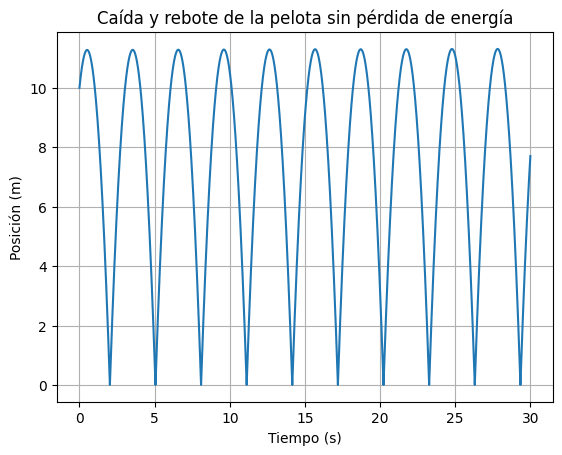

In [46]:
# Ejecutar la simulación
t, Sol = RungeKutta_DetectaRebote(0, 30, 100000, ej16, np.array([10, 5]))

# Graficar la posición vs tiempo
plt.plot(t, Sol[0])
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Caída y rebote de la pelota sin pérdida de energía")
plt.grid(True)
plt.show()

### Inciso 2

In [47]:
def ej16_ii(t, YV):
    y, v = YV
    dydt = v
    dvdt = - 9.81
    return np.array([dydt, dvdt])

def RungeKutta_DetectaRebote(a, b, N, F, Y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    Y = np.zeros((Y0.shape[0], N+1))
    Y[:, 0] = Y0

    for i in range(1, N+1):
        K1 = F(t[i-1], Y[:, i-1])
        K2 = F(t[i-1] + h, Y[:, i-1] + h * K1)
        Y[:, i] = Y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)
        if Y[0, i] <= 0:
            Y[0, i] = - Y[0, i]
            Y[1, i] = - 0.8 *Y[1, i]
    return t, Y

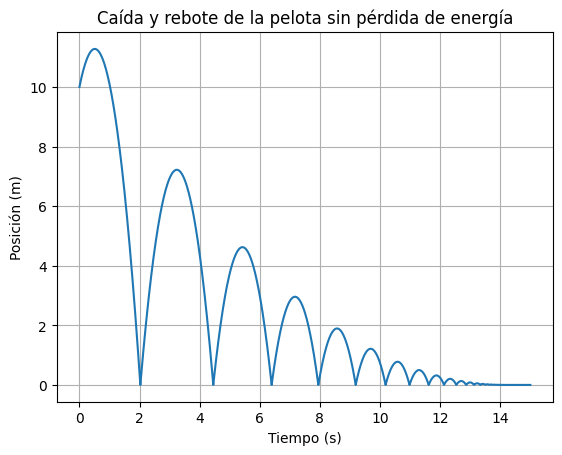

In [50]:
# Ejecutar la simulación
t, Sol = RungeKutta_DetectaRebote(0, 15, 100000, ej16, np.array([10, 5]))

# Graficar la posición vs tiempo
plt.plot(t, Sol[0])
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Caída y rebote de la pelota sin pérdida de energía")
plt.grid(True)
plt.show()

## Ejercicio 21

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
b = 1/10
A = 1


def ej21(t, X):
    theta, gamma = X
    dThetadt = gamma
    dGammadt = - A *sin(theta) - b* gamma
    return np.array([dThetadt, dGammadt])


### Inciso 1

en papel **pasar**

### Inciso 2

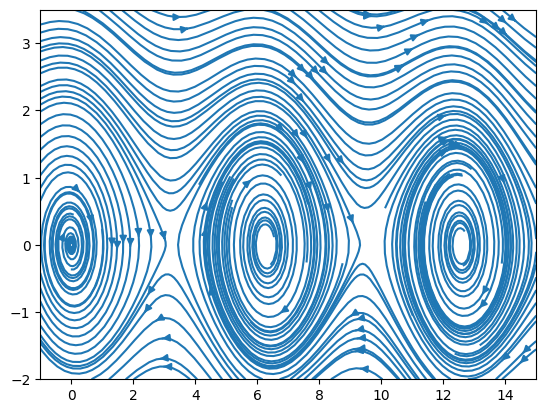

In [17]:
X_vals, Y_vals = np.linspace(-1, 15, 100), np.linspace(-2, 3.5, 100)
X, Y = np.meshgrid(X_vals, Y_vals)

dX, dY = np.zeros_like(X), np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX[i,j], dY[i,j] = ej21(0, np.array([X[i,j], Y[i,j]]))[0], ej21(0, np.array([X[i,j], Y[i,j]]))[1]


plt.streamplot(X, Y, dX, dY, broken_streamlines=False)
plt.show()



**FALTA COMPARAR CON CASO LINEAL**

### Inciso 3

In [ ]:
from ipywidgets import interact, FloatSlider, IntSlider

def plot_ej21_3(b):
    
    def ej21(t, X):
        theta, gamma = X
        dThetadt = gamma
        dGammadt = - A *sin(theta) - b* gamma
        return np.array([dThetadt, dGammadt])
    
    X_vals, Y_vals = np.linspace(-1, 15, 100), np.linspace(-2, 3.5, 100)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dX[i,j], dY[i,j] = ej21(0, np.array([X[i,j], Y[i,j]]))[0], ej21(0, np.array([X[i,j], Y[i,j]]))[1]


    plt.streamplot(X, Y, dX, dY, broken_streamlines=False)
    plt.title(f'Diagrama de fases con b = {b}')
    plt.show()

interact(plot_ej21_3, b=FloatSlider(min=0.0, max=3, step=0.01, value=0.5),)

    
    

interactive(children=(FloatSlider(value=0.5, description='b', max=3.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_ej21_3(b)>

## Ejercicio 22

In [28]:
a = b= 0.2
x0 = y0 = z0 = 1.

def ej22(t, XYZ):
    X, Y, Z = XYZ
    dxdt = -Y - Z
    dydt= X+ a * Y
    dzdt = b+ X * Z - c * Z
    return np.array([dxdt, dydt, dzdt])

### Inciso 1

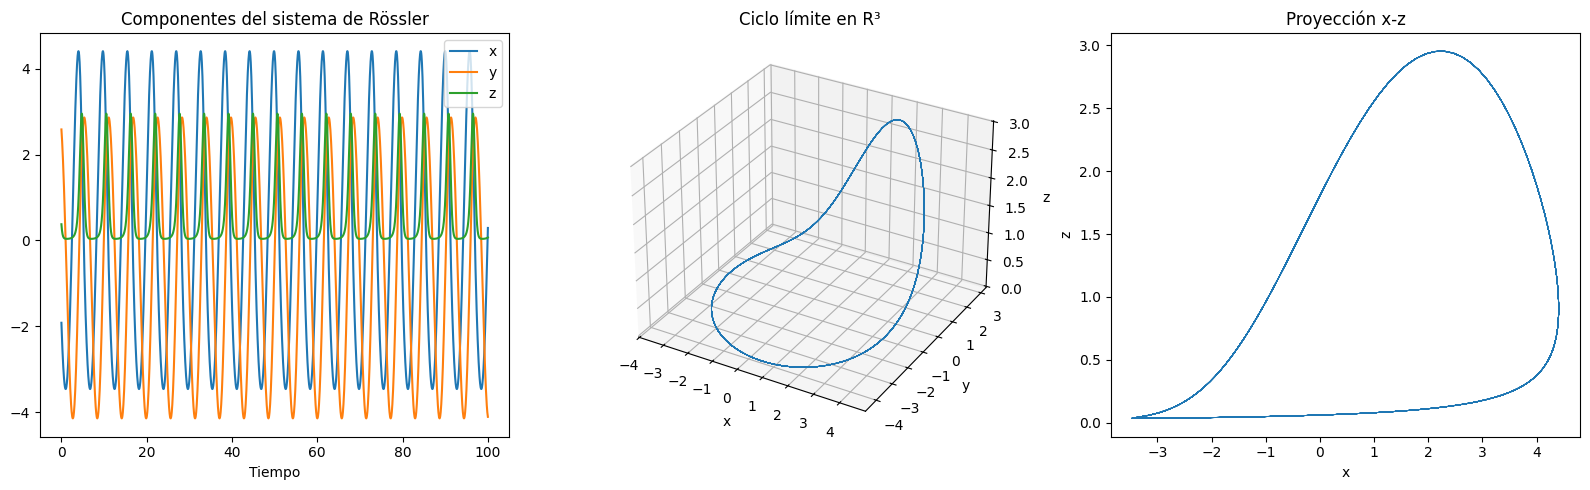

In [ ]:
c = 2.3

X0 = np.array([x0, y0, z0])

t1, sol1 = RungeKutta(0, 300, 10000, ej22, X0)

X1 = sol1[:, -1]
t2, sol2 = RungeKutta(0, 100, 3000, ej22, X1)

fig = plt.figure(figsize=(16, 5))

# Soluciones a partir del estado límite
plt.subplot(1, 3, 1)
plt.plot(t2, sol2[0], label='x')
plt.plot(t2, sol2[1], label='y')
plt.plot(t2, sol2[2], label='z')
plt.title("Componentes del sistema de Rössler")
plt.xlabel("Tiempo")
plt.legend()

# Ciclo límite en R3
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot(sol2[0], sol2[1], sol2[2], lw=0.7)
ax.set_title("Ciclo límite en R³")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Ciclo límite en el plano XZ
plt.subplot(1, 3, 3)
plt.plot(sol2[0], sol2[2], lw=0.7)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Proyección x-z")

plt.tight_layout()
plt.show()